# 1D NMR Processing and Display

a simplified environment for processing 1D Bruker NMR datasets with `SPIKE`

## Initialization

### Initialization of the environment

In [5]:
import sys
sys.path.append("/Users/mad/spike/")

In [6]:
# load all python and interactive tools
%matplotlib notebook
from spike.Interactive import INTER as I
from spike.File.BrukerNMR import Import_1D
from spike.Interactive.INTER import FileChooser, Phaser1D, Show


          SPIKE
    Version     : 0.99.2
    Date        : 06-03-2019
    Revision Id : 390
*** Importing  << zoom3D >> Failed ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  bokeh_display,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


### Choose the file

The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- The optional `base` argument, starts the exploration on a given location

In [7]:
FC = FileChooser(base='/DATA/pharma', filetype='fid')

VBox(children=(HBox(children=(Label(value='Chosen dir:  /DATA/pharma'), Button(description='Up Directory', style=ButtonStyle()))), HBox(children=(Select(description='Choose Dir', layout=Layout(width='50%'), options=('/DATA/pharma/ARTEref_161123', '/DATA/pharma/LM1-199', '/DATA/pharma/LM1-200', '/DATA/pharma/LM1-200-restreint', '/DATA/pharma/SMARTE', '/DATA/pharma/SMARTE_donnees', '/DATA/pharma/spike', '/DATA/pharma/TP'), value='/DATA/pharma/ARTEref_161123'), Button(description='Set Directory', style=ButtonStyle()))), Select(description='Choose File', layout=Layout(width='50%'), options=(' ',), value=' '), Text(value='', description='File to load', layout=Layout(width='70%'))))

After the selection, the selected filename is found in `FC.file`

In [9]:
FC.file

'/DATA/pharma/LM1-200/LM1-200-2/1/fid'

### Import dataset

This is simply done with the `Import_1D()` tool, which returns a `SPIKE` object.

We store it into a variable, evaluating the variable show a summary of the dataset. 

In [10]:
d1 = Import_1D(FC.file)
d1

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  8192 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

Many methods are attached to the `SPIKE` object, they can be either applied one by one, or piped by chaining them.

`display()` is used to display the dataset.

In the current set-up, the figure can be explored *(zoom, shift, resize, etc)* with the jupyter tools displayed  below the dataset.
The figure can also be saved as a `png` graphic file.
At anytime, the figure can be frozen by clicking on the blue button on the upper right corner.

<IPython.core.display.Javascript object>


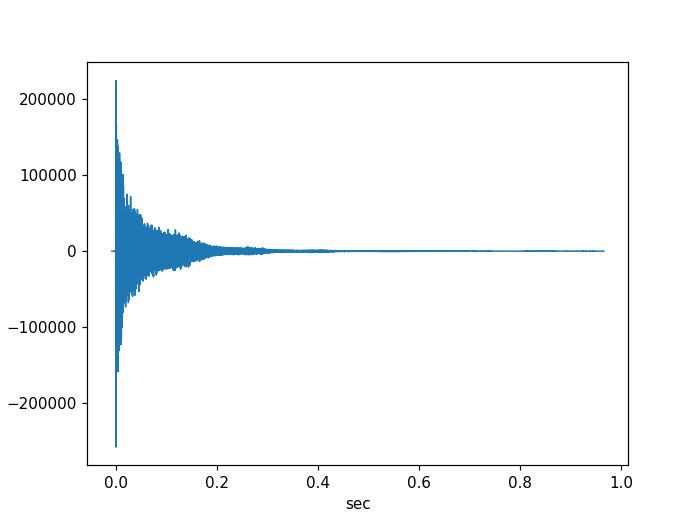

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  8192 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [11]:
d1.set_unit('sec').display()

## Basic Processing

many processing methods are available, they can be either applied one by one, or piped by chaining them.

### Fourier Transform

<IPython.core.display.Javascript object>


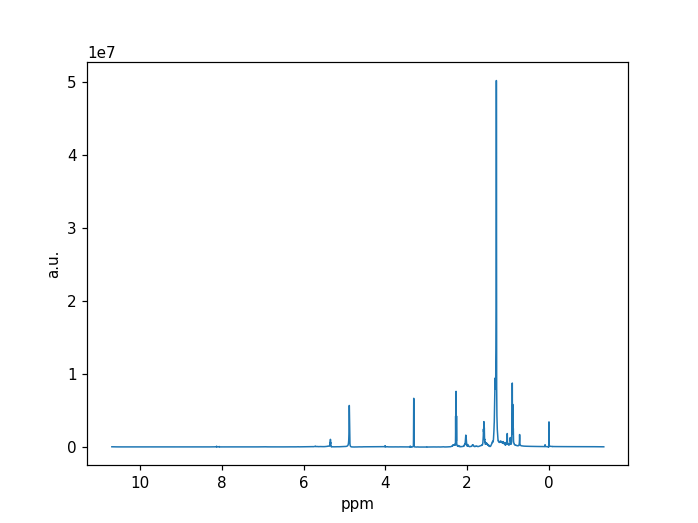

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  16384 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [12]:
D1 = d1.copy() # copy the imported data-set to another object for processing
D1.zf(2).ft_sim().bk_corr().apmin()  # chaining  zerofill - FT - Bruker correction - autophase
D1.set_unit('ppm').display()  # chain  set to ppm unit - and display

## Advanced processing

### en cours

VBox(children=(Text(value='/DATA/pharma/LM1-200/LM1-200-2/1/fid', description='File to process', layout=Layout(width='80%')), HBox(children=(Dropdown(description='Apodisation', index=1, options=('None', 'apod_sin (sine bell)', 'apod_em (Exponential)', 'apod_gm (Gaussian)', 'gaussenh (Gaussian Enhacement)', 'kaiser'), value='apod_sin (sine bell)'), FloatText(value=0.0, description='bell shape', layout=Layout(width='15%'), step=0.01), FloatText(value=1.0, description='Width in Hz', disabled=True, layout=Layout(width='15%')), FloatText(value=2.0, description='strength', disabled=True, layout=Layout(width='15%'), step=1.0), Button(description='Show effect on FID', style=ButtonStyle()))), Dropdown(description='Zero-Filling', index=1, options=(0, 1, 2, 4, 8), value=1), HBox(children=(Checkbox(value=True, description='AutoPhasing'), FloatText(value=0.0, description='Phase : P0', disabled=True, layout=Layout(width='20%')), FloatText(value=0.0, description='P1', disabled=True, layout=Layout(width='20%')))), Button(description='Process', style=ButtonStyle())))

<IPython.core.display.Javascript object>


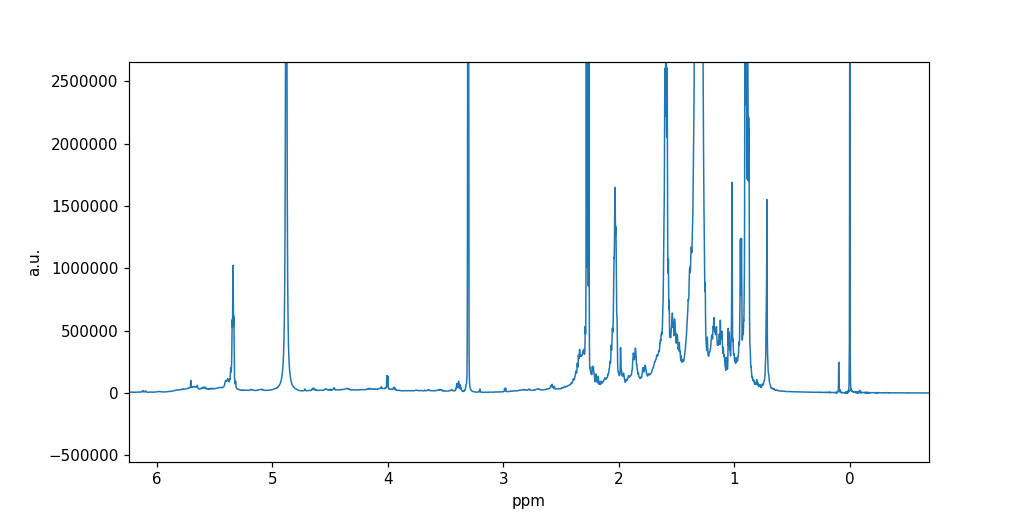

In [13]:
PD1 = I.AvProc1D(filename=FC.file)

### rephasing
might be required - an interactive phaser is available

Use `scale` and `zoom` to tune the display; then use `P0, P1, pivot` to optimize the phase.

Once finished, click on `Apply correction`

HBox(children=(Button(description='Apply correction', style=ButtonStyle()), Button(description='Cancel', style=ButtonStyle())))

VBox(children=(HBox(children=(FloatSlider(value=1.0, description='scale:', layout=Layout(width='30%'), min=1.0, step=0.5), FloatSlider(value=4.672382766637812, description='pivot:', layout=Layout(width='30%'), max=10.68367, min=-1.3389044667243764))), FloatRangeSlider(value=(0.0, 100.0), description='zoom (%):', layout=Layout(width='60%'), readout_format='.1f'), FloatSlider(value=0.0, description='P0:', layout=Layout(width='100%'), max=180.0, min=-180.0), FloatSlider(value=0.0, description='P1:', layout=Layout(width='100%'), max=360.0, min=-360.0, step=1.0)))

<IPython.core.display.Javascript object>


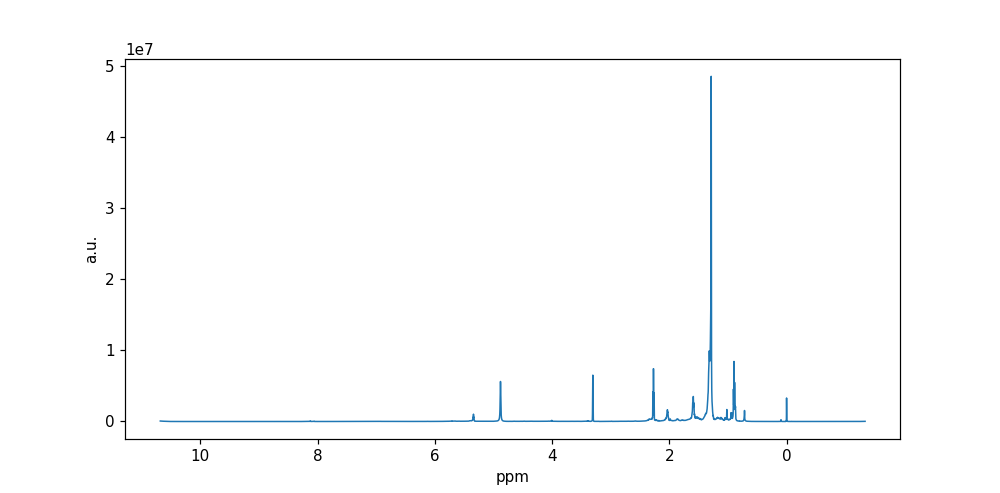

Applied: phase(-3.6,  33.0)


In [14]:
Phaser1D(PD1.data)

<IPython.core.display.Javascript object>


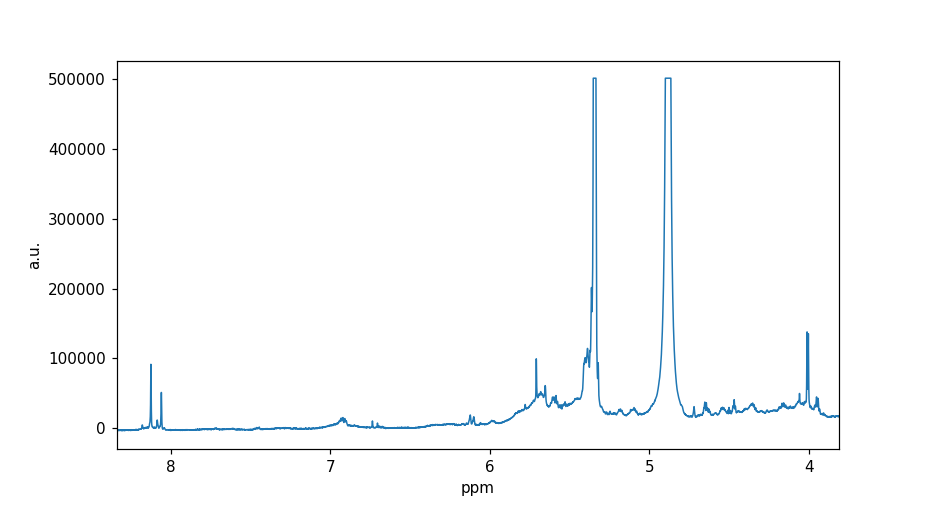

VBox(children=(HBox(children=(FloatSlider(value=1.0, description='scale:', layout=Layout(width='30%'), min=1.0, step=0.5), Button(description='Done', style=ButtonStyle()))), FloatRangeSlider(value=(0.0, 100.0), description='zoom (%):', layout=Layout(width='60%'), readout_format='.1f')))

In [15]:
Show(PD1.data)